<a href="https://colab.research.google.com/github/sabrisangjaya/sabrisangjaya.github.io/blob/master/Skripsi/Hasil/Proses_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_excel("/content/drive/My Drive/Skripsi/Skripsi_Sabri Sangjaya/Dataset/Rekap Dataset 03032020.xlsx")
df.columns
features=df[[
       'Selisih Isi', 'Jumlah Chapter', 'Font Size', 'Spasi',
       'paragraf', 'jumlah kalimat', 'jumlah total kata', 'jumlah jenis kata',
       'total suku kata', 'jumlah suku kata non poly', 'jumlah suku kata poly',
       'romantis', 'realistis', 'khayalan', 'general', 'kata/kalimat',
       'kata/paragraf', 'kata/halaman', 'kalimat/paragraf', 'kalimat/halaman',
       'paragraf/halaman', 'khayalan/kata', 'romantik/kata', 'realistik/kata',
       'general/kata']]
label=df['label']


In [0]:
df.describe()

,tahun,Halaman,Hal Isi Awal,Hal Isi Akhir,Selisih Isi,Jumlah Chapter,Font Size,Spasi,paragraf,jumlah kalimat,jumlah total kata,jumlah jenis kata,total suku kata,jumlah suku kata non poly,jumlah suku kata poly,romantis,realistis,khayalan,general,kata/kalimat,kata/paragraf,kata/halaman,kalimat/paragraf,kalimat/halaman,paragraf/halaman,khayalan/kata,romantik/kata,realistik/kata,general/kata,Jumlah Tokoh
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,0.0
mean,2016.121053,64.678947,9.115789,60.089474,50.973684,5.284211,12.265474,2.795789,288.000000,607.794737,6536.326316,1488.073684,4561.273684,487.605263,1000.468421,341.284211,109.626316,126.657895,3047.915789,10.996662,26.696558,100.825534,2.454712,9.401136,4.416382,0.019374,0.052238,0.016554,1523.957895,NaN
std,0.327050,6.801578,2.583477,6.874337,6.722334,3.230683,1.015601,14.895143,211.880794,237.821295,2367.871587,389.490788,1246.279016,112.509080,286.008356,135.322086,58.699146,59.936773,1120.463809,1.862040,10.163490,34.414729,0.901481,3.555818,2.925844,0.006357,0.009614,0.005686,560.231904,NaN
min,2016.000000,45.000000,5.000000,44.000000,30.000000,1.000000,11.000000,1.150000,88.000000,228.000000,2661.000000,727.000000,2170.000000,259.000000,468.000000,92.000000,23.000000,30.000000,1244.000000,7.351536,4.015251,46.650790,0.339949,3.619048,1.333333,0.008249,0.028518,0.007826,622.000000,NaN
25%,2016.000000,60.250000,7.000000,56.000000,47.000000,3.000000,12.000000,1.500000,187.750000,447.250000,4974.500000,1218.000000,3637.000000,412.500000,791.750000,246.500000,71.250000,87.250000,2302.250000,9.736675,19.594210,80.145933,1.827959,7.083562,2.977273,0.015276,0.045393,0.012709,1151.125000,NaN
50%,2016.000000,64.000000,9.000000,59.000000,49.000000,5.000000,12.000000,1.670000,249.000000,552.000000,6243.000000,1434.000000,4412.500000,472.500000,971.500000,322.000000,95.500000,113.000000,2823.500000,10.687715,26.100965,96.360560,2.416662,8.620313,3.850713,0.018057,0.050704,0.015403,1411.750000,NaN
75%,2016.000000,68.000000,11.000000,63.000000,53.000000,7.000000,12.000000,1.830000,318.750000,712.750000,7161.500000,1690.250000,5184.000000,541.000000,1134.750000,403.750000,131.250000,153.000000,3416.750000,12.275405,31.688498,109.546150,2.908430,10.951140,4.960433,0.021877,0.057055,0.018344,1708.375000,NaN
max,2017.000000,85.000000,18.000000,80.000000,72.000000,15.000000,18.000000,207.000000,1815.000000,1505.000000,13625.000000,2861.000000,9078.000000,954.000000,2026.000000,904.000000,390.000000,337.000000,6688.000000,20.422100,63.432690,234.637900,6.375723,23.413790,21.607140,0.054186,0.085249,0.042370,3344.000000,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   judul                      190 non-null    object 
 1   tahun                      190 non-null    int64  
 2   label                      190 non-null    object 
 3   Halaman                    190 non-null    int64  
 4   Hal Isi Awal               190 non-null    int64  
 5   Hal Isi Akhir              190 non-null    int64  
 6   Selisih Isi                190 non-null    int64  
 7   Jumlah Chapter             190 non-null    int64  
 8   Font Size                  190 non-null    float64
 9   Font Name                  190 non-null    object 
 10  Spasi                      190 non-null    float64
 11  paragraf                   190 non-null    int64  
 12  jumlah kalimat             190 non-null    int64  
 13  jumlah total kata          190 non-null    int64  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More th

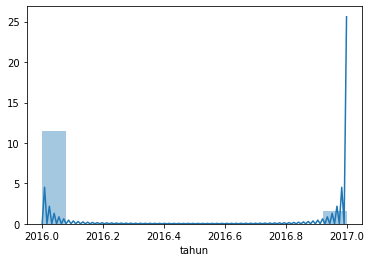

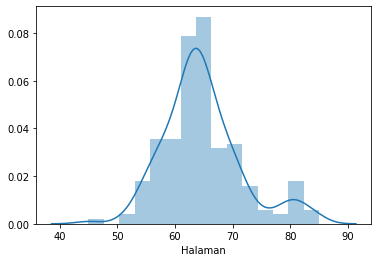

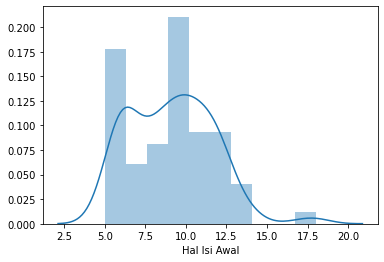

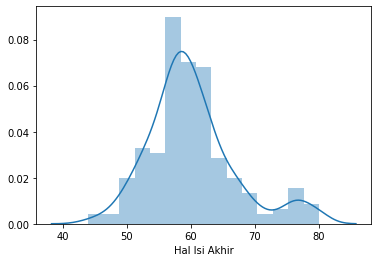

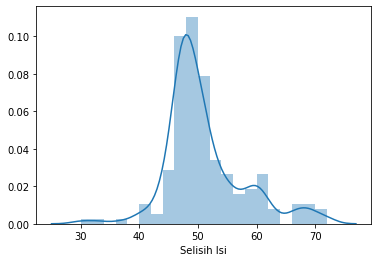

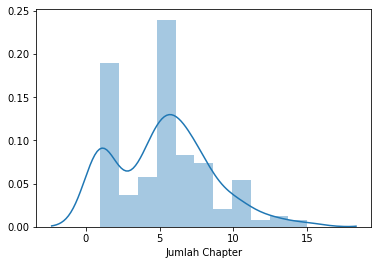

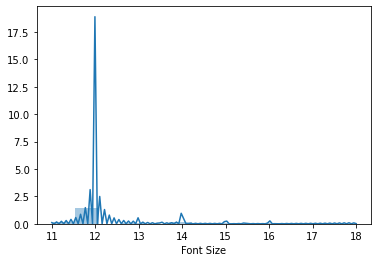

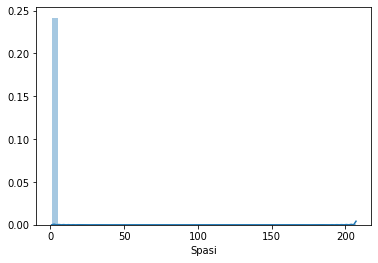

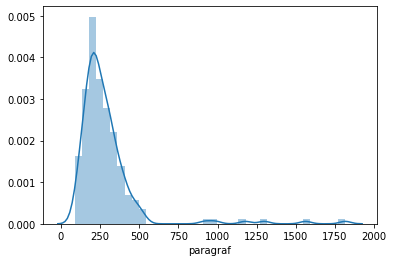

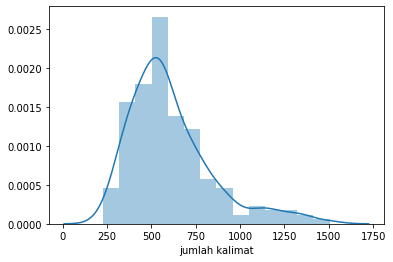

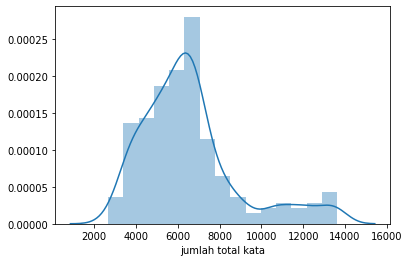

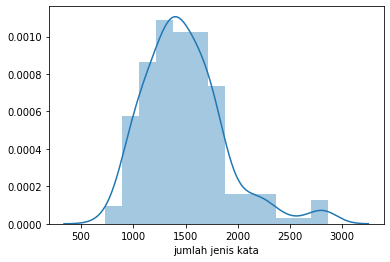

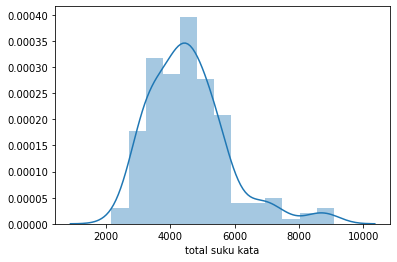

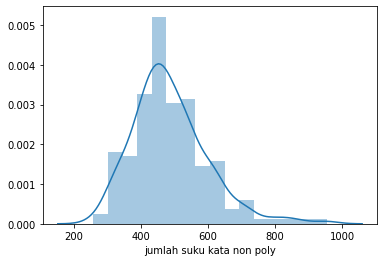

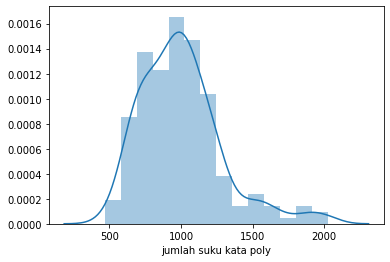

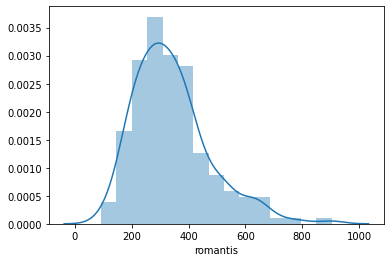

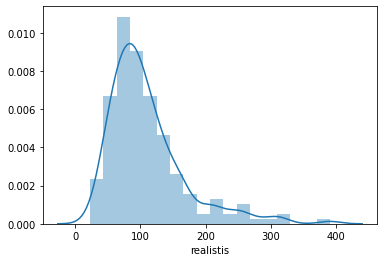

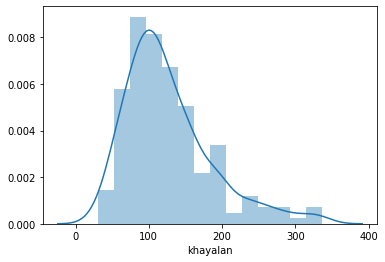

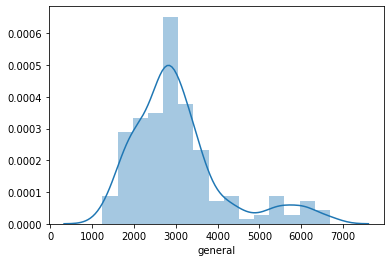

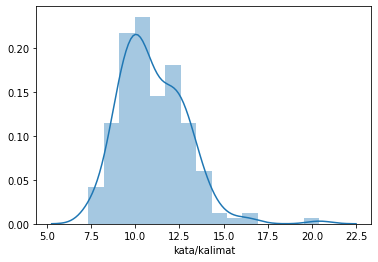

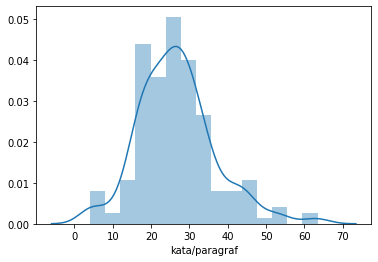

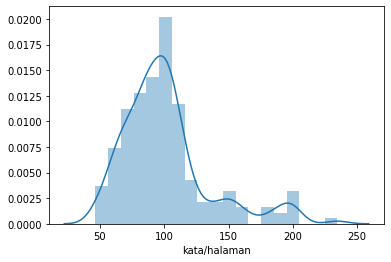

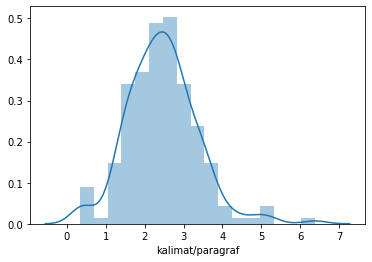

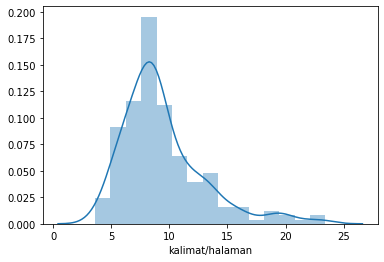

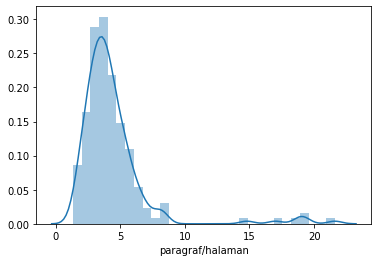

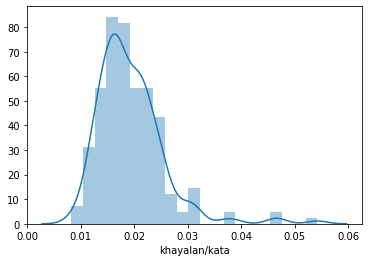

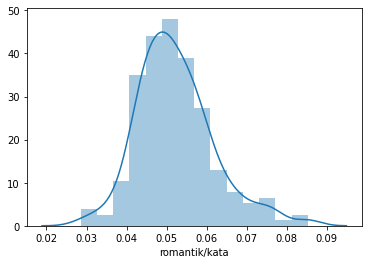

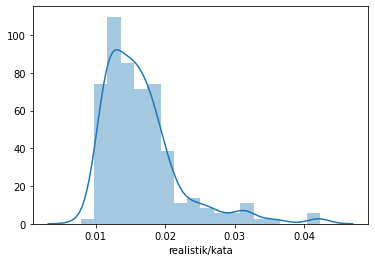

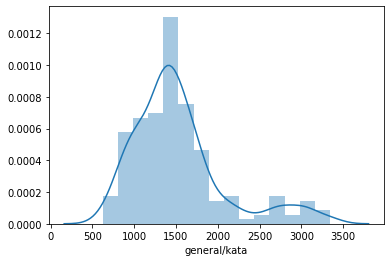

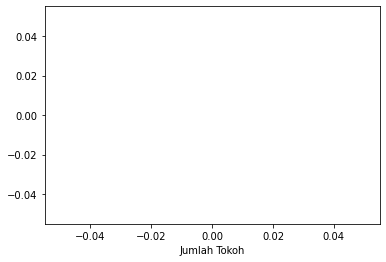

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

for i, col in enumerate(df.columns):
    if(df[col].dtype=="float64" or df[col].dtype=="int64"):
        try:
            plt.figure(i)
            sns.distplot(df[col])
        except:
            pass

In [0]:
df.groupby('label')['judul'].nunique()

label
SD     123
SMA      9
SMP     58
Name: judul, dtype: int64

# Klasifikasi

jarak=["euclidean", "manhattan","chebyshev","minkowski"]


normalisasi=["Data Asli","MinMaxScaler","MaxAbsScaler","StandardScaler","RobustScaler","Normalizer","QuantileTransformer uniform","QuantileTransformer normal","PowerTransformer yeo-johnson"]


nilaiK=list(range(2,101))



### rujukan 
1. normalisasi [ Scikit Learn Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)
2. Distance Metrics [Scikit Distance Metrics](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors,model_selection
from sklearn.model_selection import  cross_validate,cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn import preprocessing

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=100)
import warnings
warnings.filterwarnings('ignore')

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='macro')}
listnilai=list(range(2,101))
pengukuranjarak=["euclidean", "manhattan","chebyshev","minkowski"]
jenisnormalisasi=["Data Asli","MinMaxScaler","MaxAbsScaler","StandardScaler","RobustScaler","Normalizer",
                  "QuantileTransformer uniform","QuantileTransformer normal","PowerTransformer yeo-johnson"]
#jenisnormalisasi=["Data Asli","MinMaxScaler","StandardScaler"]
jenisresampling=["asli","smote"]
jenisknn=["KNN","WDKNN"]
data=[]

for jenisklasifikasi in jenisknn:
    if jenisklasifikasi=="KNN":
        weights="uniform"
    elif jenisklasifikasi=="WDKNN":
        weights="distance"
    for normalisasi in jenisnormalisasi:
        X=features.loc[:,:]
        y=label.loc[:]
        if(normalisasi=="Data Asli"):
            X=X
        elif(normalisasi=="MinMaxScaler"):    
            X=preprocessing.MinMaxScaler().fit_transform(X)
        elif(normalisasi=="MaxAbsScaler"): 
            X=preprocessing.MaxAbsScaler().fit_transform(X)
        elif(normalisasi=="StandardScaler"): 
            X=preprocessing.StandardScaler().fit_transform(X)
        elif(normalisasi=="RobustScaler"): 
            X=preprocessing.RobustScaler().fit_transform(X)
        elif(normalisasi=="Normalizer"): 
            X=preprocessing.Normalizer().fit_transform(X)
        elif(normalisasi=="QuantileTransformer uniform"): 
            X=preprocessing.QuantileTransformer(output_distribution='uniform').fit_transform(X)
        elif(normalisasi=="QuantileTransformer normal"): 
            X=preprocessing.QuantileTransformer(output_distribution='normal').fit_transform(X)
        elif(normalisasi=="PowerTransformer yeo-johnson"): 
            X=preprocessing.PowerTransformer(method='yeo-johnson').fit_transform(X)
        elif(normalisasi=="PowerTransformer box-cox"): 
            X=preprocessing.PowerTransformer(method='box-cox').fit_transform(X)
        for resampling in jenisresampling:
            if(resampling=="biasa"):
                X=X
                y=y
            elif(resampling=="smote"):
                X,y=sm.fit_resample(features, label)
            for jarak in pengukuranjarak:
                for nilaik in listnilai:
                    if(jarak=='mahalanobis' or jarak=="seuclidean" or jarak=="wminkowski"):
                        continue
                        #model=neighbors.KNeighborsClassifier(n_neighbors=5,metric=jarak,metric_params={'V': np.cov(X)})
                    elif(jarak=='minkowski'):
                        model=neighbors.KNeighborsClassifier(n_neighbors=nilaik,metric="minkowski",p=1.5,weights=weights)
                    else:
                        model=neighbors.KNeighborsClassifier(n_neighbors=nilaik,metric=jarak,weights=weights)
                    results = cross_validate(estimator=model,X=X,y=y,cv=10,scoring=scoring)
                    y_pred = cross_val_predict(estimator=model,X=X,y=y,cv=10)
                    unique_label = np.unique([y, y_pred])
                    cmtx = pd.DataFrame(
                        confusion_matrix(y, y_pred, labels=unique_label), 
                        index=['true:{:}'.format(x) for x in unique_label], 
                        columns=['pred:{:}'.format(x) for x in unique_label]
                    )
                    #print(cmtx)
                    #,cmtx.loc['true:SMA','pred:SMA'])
                    #for i in results:
                        #print(i,results[i].mean())
                    #print(resampling,normalisasi,jarak,nilaik,"=",results["test_accuracy"].mean())
                    print(resampling,normalisasi,jarak,jenisklasifikasi)

                    data.append([jenisklasifikasi,resampling,normalisasi,jarak,nilaik,
                                results["fit_time"].mean(),results["score_time"].mean(),
                                results["test_accuracy"].mean(),results["test_precision"].mean(),
                                results["test_recall"].mean(),results["test_f1_score"].mean(),
                                cmtx.loc['true:SD','pred:SD'],cmtx.loc['true:SD','pred:SMP'],
                                cmtx.loc['true:SD','pred:SMA'],cmtx.loc['true:SMP','pred:SD'],
                                cmtx.loc['true:SMP','pred:SMP'],cmtx.loc['true:SMP','pred:SMA'],
                                cmtx.loc['true:SMA','pred:SD'],cmtx.loc['true:SMA','pred:SMP'],
                                cmtx.loc['true:SMA','pred:SMA']])

Using TensorFlow backend.


asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli euclidean KNN
asli Data Asli

asli Data Asli chebyshev KNN
asli Data Asli chebyshev KNN
asli Data Asli chebyshev KNN
asli Data Asli chebyshev KNN
asli Data Asli chebyshev KNN
asli Data Asli chebyshev KNN
asli Data Asli chebyshev KNN
asli Data Asli chebyshev KNN
asli Data Asli chebyshev KNN
asli Data Asli chebyshev KNN
asli Data Asli chebyshev KNN
asli Data Asli chebyshev KNN
asli Data Asli chebyshev KNN
asli Data Asli chebyshev KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli minkowski KNN
asli Data Asli

smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data Asli manhattan KNN
smote Data

asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli MinMaxScaler euclidean KNN
asli Min

asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli MinMaxScaler minkowski KNN
asli Min

smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinMaxScaler manhattan KNN
smote MinM

asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli MaxAbsScaler euclidean KNN
asli Max

asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli MaxAbsScaler chebyshev KNN
asli Max

smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxAbsScaler manhattan KNN
smote MaxA

smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
smote MaxAbsScaler minkowski KNN
asli StandardScaler euclidean KNN
asli StandardScaler euclidean KNN
asli StandardScaler euclidean KNN
asli St

asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardScaler chebyshev KNN
asli StandardS

smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler euclidean KNN
smote StandardScaler

smote StandardScaler chebyshev KNN
smote StandardScaler chebyshev KNN
smote StandardScaler chebyshev KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler minkowski KNN
smote StandardScaler

asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli RobustScaler manhattan KNN
asli Rob

smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote RobustScaler euclidean KNN
smote Robu

smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote RobustScaler chebyshev KNN
smote Robu

asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Normalizer manhattan KNN
asli Norma

asli Normalizer minkowski KNN
asli Normalizer minkowski KNN
asli Normalizer minkowski KNN
asli Normalizer minkowski KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normalizer euclidean KNN
smote Normal

smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote Normalizer chebyshev KNN
smote No

asli QuantileTransformer uniform euclidean KNN
asli QuantileTransformer uniform euclidean KNN
asli QuantileTransformer uniform euclidean KNN
asli QuantileTransformer uniform euclidean KNN
asli QuantileTransformer uniform euclidean KNN
asli QuantileTransformer uniform euclidean KNN
asli QuantileTransformer uniform euclidean KNN
asli QuantileTransformer uniform euclidean KNN
asli QuantileTransformer uniform euclidean KNN
asli QuantileTransformer uniform euclidean KNN
asli QuantileTransformer uniform euclidean KNN
asli QuantileTransformer uniform euclidean KNN
asli QuantileTransformer uniform manhattan KNN
asli QuantileTransformer uniform manhattan KNN
asli QuantileTransformer uniform manhattan KNN
asli QuantileTransformer uniform manhattan KNN
asli QuantileTransformer uniform manhattan KNN
asli QuantileTransformer uniform manhattan KNN
asli QuantileTransformer uniform manhattan KNN
asli QuantileTransformer uniform manhattan KNN
asli QuantileTransformer uniform manhattan KNN
asli Quantile

asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli QuantileTransformer uniform chebyshev KNN
asli Quantile

smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclidean KNN
smote QuantileTransformer uniform euclid

smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebyshev KNN
smote QuantileTransformer uniform chebys

smote QuantileTransformer uniform minkowski KNN
smote QuantileTransformer uniform minkowski KNN
smote QuantileTransformer uniform minkowski KNN
smote QuantileTransformer uniform minkowski KNN
smote QuantileTransformer uniform minkowski KNN
smote QuantileTransformer uniform minkowski KNN
smote QuantileTransformer uniform minkowski KNN
smote QuantileTransformer uniform minkowski KNN
smote QuantileTransformer uniform minkowski KNN
smote QuantileTransformer uniform minkowski KNN
smote QuantileTransformer uniform minkowski KNN
smote QuantileTransformer uniform minkowski KNN
asli QuantileTransformer normal euclidean KNN
asli QuantileTransformer normal euclidean KNN
asli QuantileTransformer normal euclidean KNN
asli QuantileTransformer normal euclidean KNN
asli QuantileTransformer normal euclidean KNN
asli QuantileTransformer normal euclidean KNN
asli QuantileTransformer normal euclidean KNN
asli QuantileTransformer normal euclidean KNN
asli QuantileTransformer normal euclidean KNN
asli Quant

asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal manhattan KNN
asli QuantileTransformer normal ma

asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal minkowski KNN
asli QuantileTransformer normal mi

smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote QuantileTransformer normal manhattan KNN
smote Quantil

smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote QuantileTransformer normal minkowski KNN
smote Quantil

asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclidean KNN
asli PowerTransformer yeo-johnson euclid

asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebyshev KNN
asli PowerTransformer yeo-johnson chebys

smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransformer yeo-johnson euclidean KNN
smote PowerTransform

smote PowerTransformer yeo-johnson manhattan KNN
smote PowerTransformer yeo-johnson manhattan KNN
smote PowerTransformer yeo-johnson manhattan KNN
smote PowerTransformer yeo-johnson manhattan KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransformer yeo-johnson chebyshev KNN
smote PowerTransform

smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransformer yeo-johnson minkowski KNN
smote PowerTransform

asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Data Asli chebyshev WDKNN
asli Dat

smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli euclidean WDKNN
smote Data Asli manhattan WDKNN
smote Data Asli manhattan WDKNN
smote Data Asli manhattan WDKNN
smote Data Asli manhattan WDKNN
smote Data Asli manhattan WDKNN
smote Data Asli manhattan WDKNN
smote Data Asli manhattan WDKNN
smote Data Asli manhattan WDKNN
smote Data Asli manhattan WDKNN
smote Data Asli manhattan WDKNN
smote Da

smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Data Asli minkowski WDKNN
smote Da

asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler manhattan WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxScaler chebyshev WDKNN
asli MinMaxSca

smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler euclidean WDKNN
smote MinMaxScaler e

smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler chebyshev WDKNN
smote MinMaxScaler c

asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsScaler manhattan WDKNN
asli MaxAbsSca

asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsScaler minkowski WDKNN
asli MaxAbsSca

smote MaxAbsScaler manhattan WDKNN
smote MaxAbsScaler manhattan WDKNN
smote MaxAbsScaler manhattan WDKNN
smote MaxAbsScaler manhattan WDKNN
smote MaxAbsScaler manhattan WDKNN
smote MaxAbsScaler manhattan WDKNN
smote MaxAbsScaler manhattan WDKNN
smote MaxAbsScaler manhattan WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler chebyshev WDKNN
smote MaxAbsScaler c

asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidean WDKNN
asli StandardScaler euclidea

asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshev WDKNN
asli StandardScaler chebyshe

smote StandardScaler euclidean WDKNN
smote StandardScaler euclidean WDKNN
smote StandardScaler euclidean WDKNN
smote StandardScaler euclidean WDKNN
smote StandardScaler euclidean WDKNN
smote StandardScaler euclidean WDKNN
smote StandardScaler euclidean WDKNN
smote StandardScaler euclidean WDKNN
smote StandardScaler euclidean WDKNN
smote StandardScaler euclidean WDKNN
smote StandardScaler euclidean WDKNN
smote StandardScaler euclidean WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
smote StandardScaler manhattan WDKNN
s

smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
smote StandardScaler minkowski WDKNN
s

asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustScaler manhattan WDKNN
asli RobustSca

asli RobustScaler minkowski WDKNN
asli RobustScaler minkowski WDKNN
asli RobustScaler minkowski WDKNN
asli RobustScaler minkowski WDKNN
asli RobustScaler minkowski WDKNN
asli RobustScaler minkowski WDKNN
asli RobustScaler minkowski WDKNN
asli RobustScaler minkowski WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean WDKNN
smote RobustScaler euclidean

smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler chebyshev WDKNN
smote RobustScaler c

asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer euclidean WDKNN
asli Normalizer manhattan WDKNN
asli Normalizer manhattan WDKNN
asli Normalizer manhattan WDKNN
asli Normalizer manhattan WDKNN
asli Normalizer manhattan WDKNN
asli Nor

asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Normalizer minkowski WDKNN
asli Nor

smote Normalizer manhattan WDKNN
smote Normalizer manhattan WDKNN
smote Normalizer manhattan WDKNN
smote Normalizer manhattan WDKNN
smote Normalizer manhattan WDKNN
smote Normalizer manhattan WDKNN
smote Normalizer manhattan WDKNN
smote Normalizer manhattan WDKNN
smote Normalizer manhattan WDKNN
smote Normalizer manhattan WDKNN
smote Normalizer manhattan WDKNN
smote Normalizer manhattan WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Normalizer chebyshev WDKNN
smote Norm

asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransformer uniform euclidean WDKNN
asli QuantileTransfo

asli QuantileTransformer uniform manhattan WDKNN
asli QuantileTransformer uniform manhattan WDKNN
asli QuantileTransformer uniform manhattan WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransformer uniform chebyshev WDKNN
asli QuantileTransfo

asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransformer uniform minkowski WDKNN
asli QuantileTransfo

smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN
smote QuantileTransformer uniform manhattan WDKNN


smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN
smote QuantileTransformer uniform minkowski WDKNN


asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidean WDKNN
asli QuantileTransformer normal euclidea

asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshev WDKNN
asli QuantileTransformer normal chebyshe

smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransformer normal euclidean WDKNN
smote QuantileTransf

smote QuantileTransformer normal manhattan WDKNN
smote QuantileTransformer normal manhattan WDKNN
smote QuantileTransformer normal manhattan WDKNN
smote QuantileTransformer normal manhattan WDKNN
smote QuantileTransformer normal manhattan WDKNN
smote QuantileTransformer normal manhattan WDKNN
smote QuantileTransformer normal manhattan WDKNN
smote QuantileTransformer normal manhattan WDKNN
smote QuantileTransformer normal manhattan WDKNN
smote QuantileTransformer normal manhattan WDKNN
smote QuantileTransformer normal manhattan WDKNN
smote QuantileTransformer normal manhattan WDKNN
smote QuantileTransformer normal chebyshev WDKNN
smote QuantileTransformer normal chebyshev WDKNN
smote QuantileTransformer normal chebyshev WDKNN
smote QuantileTransformer normal chebyshev WDKNN
smote QuantileTransformer normal chebyshev WDKNN
smote QuantileTransformer normal chebyshev WDKNN
smote QuantileTransformer normal chebyshev WDKNN
smote QuantileTransformer normal chebyshev WDKNN
smote QuantileTransf

smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransformer normal minkowski WDKNN
smote QuantileTransf

asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN
asli PowerTransformer yeo-johnson manhattan WDKNN


asli PowerTransformer yeo-johnson chebyshev WDKNN
asli PowerTransformer yeo-johnson chebyshev WDKNN
asli PowerTransformer yeo-johnson chebyshev WDKNN
asli PowerTransformer yeo-johnson chebyshev WDKNN
asli PowerTransformer yeo-johnson chebyshev WDKNN
asli PowerTransformer yeo-johnson chebyshev WDKNN
asli PowerTransformer yeo-johnson chebyshev WDKNN
asli PowerTransformer yeo-johnson chebyshev WDKNN
asli PowerTransformer yeo-johnson chebyshev WDKNN
asli PowerTransformer yeo-johnson chebyshev WDKNN
asli PowerTransformer yeo-johnson minkowski WDKNN
asli PowerTransformer yeo-johnson minkowski WDKNN
asli PowerTransformer yeo-johnson minkowski WDKNN
asli PowerTransformer yeo-johnson minkowski WDKNN
asli PowerTransformer yeo-johnson minkowski WDKNN
asli PowerTransformer yeo-johnson minkowski WDKNN
asli PowerTransformer yeo-johnson minkowski WDKNN
asli PowerTransformer yeo-johnson minkowski WDKNN
asli PowerTransformer yeo-johnson minkowski WDKNN
asli PowerTransformer yeo-johnson minkowski WDKNN


smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-johnson euclidean WDKNN
smote PowerTransformer yeo-john

smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-johnson chebyshev WDKNN
smote PowerTransformer yeo-john

smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN
smote PowerTransformer yeo-johnson minkowski WDKNN


In [0]:
import pandas as pd
dataexport=pd.DataFrame(data)




dataexport.columns=["KNN","Sampling",
"Normalisasi",
"Jarak",
"Nilai K",
"Time Train",
"Score Time",
"Akurasi",
"Presisi",
"Recall",
"F1 Score",
"True SD Pred SD",
"True SD Pred SMP",
"True SD Pred SMA",
"True SMP Pred SD",
"True SMP Pred SMP",
"True SMP Pred SMA",
"True SMA Pred SD",
"True SMA Pred SMP",
"True SMA Pred SMA"]
dataexport.to_excel("hasil08052020.xlsx")
dataexport.to_json("hasil08052020.json",orient='index')
dataexport


,KNN,Sampling,Normalisasi,Jarak,Nilai K,Time Train,Score Time,Akurasi,Presisi,Recall,F1 Score,True SD Pred SD,True SD Pred SMP,True SD Pred SMA,True SMP Pred SD,True SMP Pred SMP,True SMP Pred SMA,True SMA Pred SD,True SMA Pred SMP,True SMA Pred SMA
0,KNN,asli,Data Asli,euclidean,2,0.004684,0.014063,0.589770,0.278533,0.334188,0.295770,107,12,4,52,5,1,8,1,0
1,KNN,asli,Data Asli,euclidean,3,0.002400,0.012568,0.553746,0.330499,0.348462,0.336012,91,31,1,44,14,0,4,5,0
2,KNN,asli,Data Asli,euclidean,4,0.003092,0.012369,0.605554,0.345635,0.359615,0.340247,105,17,1,47,10,1,5,4,0
3,KNN,asli,Data Asli,euclidean,5,0.002991,0.011576,0.595291,0.357063,0.359829,0.346990,101,22,0,45,12,1,5,4,0
4,KNN,asli,Data Asli,euclidean,6,0.003093,0.013160,0.610525,0.311401,0.352244,0.320545,108,15,0,50,8,0,6,3,0
5,KNN,asli,Data Asli,euclidean,7,0.002489,0.012474,0.621343,0.331281,0.361688,0.332935,109,14,0,49,9,0,5,4,0
6,KNN,asli,Data Asli,euclidean,8,0.002295,0.012366,0.636314,0.348971,0.357158,0.316388,116,7,0,53,5,0,6,3,0
7,KNN,asli,Data Asli,euclidean,9,0.002494,0.012066,0.617226,0.289518,0.352179,0.310371,111,12,0,52,6,0,6,3,0
8,KNN,asli,Data Asli,euclidean,10,0.002595,0.013661,0.604905,0.266030,0.333974,0.287624,112,11,0,55,3,0,6,3,0
9,KNN,asli,Data Asli,euclidean,11,0.002489,0.012371,0.611992,0.255463,0.336752,0.283573,114,9,0,56,2,0,6,3,0
